# Titanic Project Classification

Data Description.

Importing Required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

Loading the data.

In [2]:
df=pd.read_csv('Titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape     #checking data dimensions.

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.dtypes    #checking the data type.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Checking for null values 

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

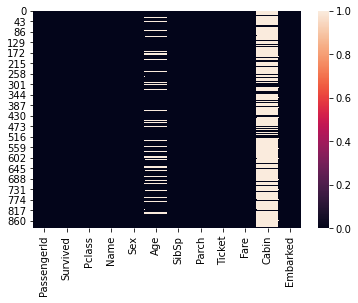

In [10]:
sns.heatmap(df.isnull())
plt.show()

In [11]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))

In [12]:
df['Embarked'].mode()

0    S
dtype: object

In [13]:
df["Embarked"].fillna('S', inplace=True)

In [14]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

Making DataFrame for the Nominal data.

In [15]:
df_visualization_nominal=df[['Sex','Embarked']].copy()

In [16]:
df_visualization_nominal.columns

Index(['Sex', 'Embarked'], dtype='object')

Visualization of the data.

male      577
female    314
Name: Sex, dtype: int64


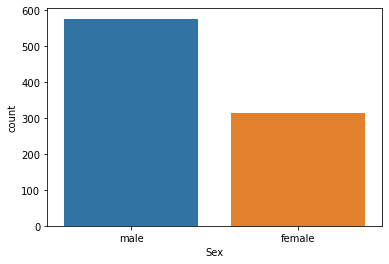

S    646
C    168
Q     77
Name: Embarked, dtype: int64


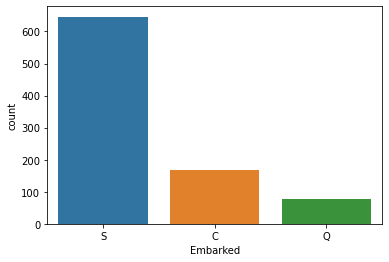

In [17]:
k=['Sex','Embarked']
for m in k:
    sns.countplot(x=m,data=df_visualization_nominal)
    print(df_visualization_nominal[m].value_counts())
    plt.show()

0    549
1    342
Name: Survived, dtype: int64


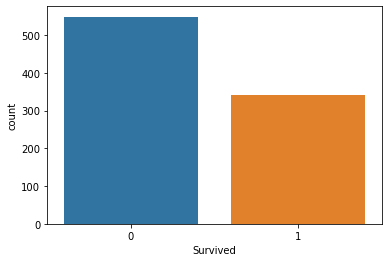

In [18]:
sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())
plt.show()

In [19]:
df.describe() #Statistical Summary.

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


   Pclass  Survived
2       3  0.242363
1       2  0.472826
0       1  0.629630


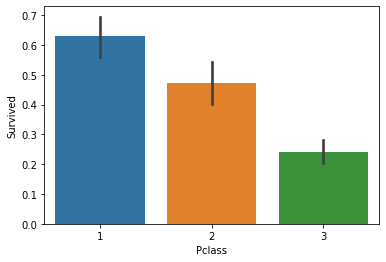

In [20]:
sns.barplot(x='Pclass', y='Survived', data=df)
print(df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived'))
plt.show()

      Sex  Survived
0  female  0.742038
1    male  0.188908


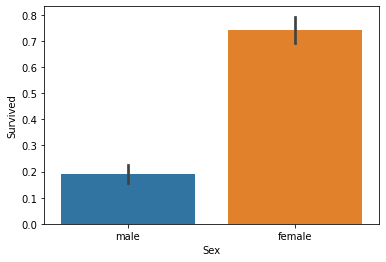

In [21]:
sns.barplot(x='Sex',y='Survived',data=df)
print(df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False))
plt.show()

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


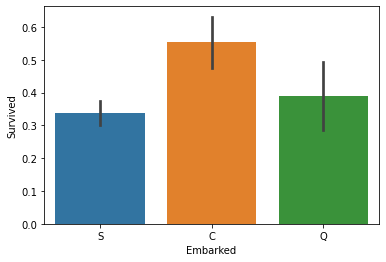

In [22]:
sns.barplot(x='Embarked',y='Survived',data=df)
print(df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False))
plt.show()

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


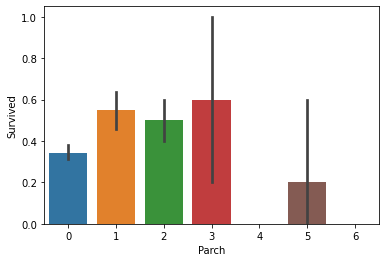

In [23]:
sns.barplot(x='Parch',y='Survived',data=df)
print(df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False))
plt.show()

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


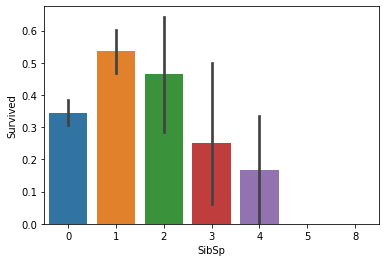

In [24]:
sns.barplot(x='SibSp',y='Survived',data=df)
print(df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False))
plt.show()

Sex and Embarked columns have categorical data but we need numerical data to train the model. so with the encoder method, we will change these columns from categorical type to numerical type.

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Splitting the data.

In [29]:
x=df.drop('Survived',axis=1)
y=df['Survived']

Finding the best random state.

In [30]:
lr=LogisticRegression()

In [31]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('best accuracy score is',maxAccu,'for the best random state',maxRS)

best accuracy score is 0.8470149253731343 for the best random state 6


Creating train_test_split and applying the models.

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=6)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
dr=DecisionTreeClassifier()
svc=SVC()
rf=RandomForestClassifier()

In [34]:
model=[lr,dr,svc,rf]

In [35]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.8470149253731343
[[159  15]
 [ 26  68]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       174
           1       0.82      0.72      0.77        94

    accuracy                           0.85       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.85      0.85      0.84       268



accuracy score of DecisionTreeClassifier() is:
0.7910447761194029
[[141  33]
 [ 23  71]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       174
           1       0.68      0.76      0.72        94

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



accuracy score of SVC() is:
0.6902985074626866
[[159  15]
 [ 68  26]]
              precision    recall  f1-score   support

           0       0.70      0.91      0.79

Cross_validation_score

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
lrs=cross_val_score(lr,x,y,cv=5)
print('cross validation of LogisticRegression:',lrs.mean())

cross validation of LogisticRegression: 0.786761659657272


In [38]:
drs=cross_val_score(dr,x,y,cv=5)
print('cross validation of DecisionTreeClassiffier:',drs.mean())

cross validation of DecisionTreeClassiffier: 0.7665871571150588


In [39]:
svs=cross_val_score(svc,x,y,cv=5)
print('cross validation of SVC:',svs.mean())

cross validation of SVC: 0.6757328479065972


In [40]:
rfs=cross_val_score(rf,x,y,cv=5)
print('cross validation of RandomForestClassifier:',rfs.mean())

cross validation of RandomForestClassifier: 0.8092586780490867


Hyperparameter Tuning.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
grid_param={'criterion':['gini','entropy']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'entropy'}


In [44]:
gd_pred=gd.best_estimator_.predict(x_test)

In [45]:
accuracy_score(y_test,gd_pred)

0.9776119402985075

In [46]:
print(confusion_matrix(y_test,gd_pred))
print(classification_report(y_test,gd_pred))

[[172   2]
 [  4  90]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       174
           1       0.98      0.96      0.97        94

    accuracy                           0.98       268
   macro avg       0.98      0.97      0.98       268
weighted avg       0.98      0.98      0.98       268



Saving the best model.

In [47]:
import joblib
joblib.dump(gd.best_estimator_,'Titanic.pkl')

['Titanic.pkl']